# Personal report particpant 4,7,8
By Sheng Wang

### Aim
1. The aim of the report is to clean the data set and perform analysis to indicate any weekly trend of individual's step count.
2. How does weekend step counts different to the first two days of the week?

### Exploration
That we will first attempt to process the csv of marks of the participant's step data.The dataframe will be imported using pandas. We uses the pandas profiling for exploring the dataset.

In [1]:
#started 2022/10/08 finished 2022/10/08 by Sheng
import pandas as pd #import API
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import scipy.stats as stats
from matplotlib.pyplot import MultipleLocator
n = pd.read_csv('C:/Users/danie/Downloads/Participant-04.csv')#read the data downloaded using pandas
n1 = pd.read_csv('C:/Users/danie/Downloads/Participant-07.csv')
n2  = pd.read_csv('C:/Users/danie/Downloads/Participant-08.csv')
n2

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0.0


The dataframe has been imported.

We  then want to clean the data so it is able to answer our aim

In [2]:
#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n['Start']), "Steps":n['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling
dd = d.drop([0,1])
dd['Date'] = pd.to_datetime(d['Date'])
e = dd.resample('W', on="Date").sum()#resample to combine days into weeks
f = e.reset_index(drop=False)#give index again
f
#repetition for participant 7,8
m = pd.DataFrame({"Date": pd.to_datetime(n1['Start']), "Steps":n1['Steps (count)']})
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')
s =  m.groupby(['Date']).sum()
d = s.reset_index(drop=False)
dd = d.drop([0,1])
dd['Date'] = pd.to_datetime(d['Date'])
e = dd.resample('W', on="Date").sum()
f1 = e.reset_index(drop=False)
f1
m = pd.DataFrame({"Date": pd.to_datetime(n2['Start']), "Steps":n2['Steps (count)']})
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')
s =  m.groupby(['Date']).sum()
d = s.reset_index(drop=False)
dd = d.drop([0,1])
dd['Date'] = pd.to_datetime(d['Date'])
e = dd.resample('W', on="Date").sum()
f2 = e.reset_index(drop=False)
f

,Date,Steps
0,2022-01-09,71137.008341
1,2022-01-16,72000.345535
2,2022-01-23,76708.552968
3,2022-01-30,82691.949753
4,2022-02-06,72231.710790
5,2022-02-13,86187.376206
6,2022-02-20,83411.319657
7,2022-02-27,74467.556502
8,2022-03-06,74257.261975
9,2022-03-13,76971.907148


The hour measures has been merged into daily counts, then the days merged into week for weekly data.

Then we plot the step count of the participants.

(0.0, 34.0)

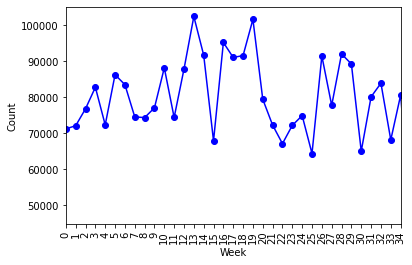

In [3]:
#started 2022/10/09 finished 2022/10/25 by Sheng and thanks for exploration and work from Tianshu
#participant 4 weekly steps
plt.plot(f.index, f['Steps'], color="blue",marker="o") 
plt.xlabel('Week')#axis labels
plt.ylabel('Count')
plt.xticks(rotation=90)#rotate axis for nicer look

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,34)  # Set the x range matching the dataframe above



(0.0, 35.0)

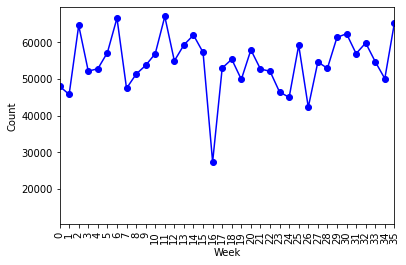

In [4]:
#started 2022/10/09 finished 2022/10/25 by Sheng and thanks for exploration and work from Tianshu
#participant 7 weekly steps
plt.plot(f1.index, f1['Steps'], color="blue",marker="o") 
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=90)

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,35) 
#repetition on 7



(0.0, 35.0)

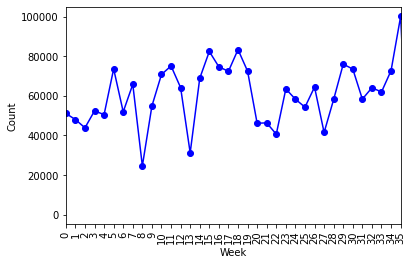

In [5]:
#started 2022/10/09 finished 2022/10/25 by Sheng and thanks for exploration and work from Tianshu
#participant 8 weekly steps
plt.plot(f2.index, f2['Steps'], color="blue",marker="o") 
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=90)

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,35)



All participants showing flucatuatinng weekly steps over time, but with no other clear pattern.

(0.0, 35.0)

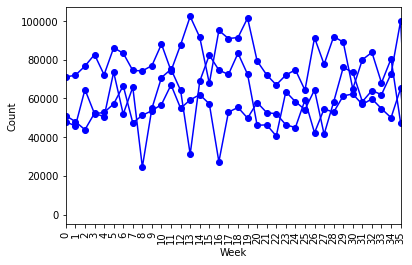

In [6]:
#started 2022/10/18 finished 2022/10/25 by Sheng and thanks for exploration and work from Tianshu
# adding all three participant's plot
plt.plot(f2.index, f2['Steps'], color="blue",marker="o") 
plt.xlabel('Week')
plt.ylabel('Count')
plt.plot(f.index, f['Steps'], color="blue",marker="o") 
plt.plot(f1.index, f1['Steps'], color="blue",marker="o") 
plt.xticks(rotation=90)

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,35)

The graph of 3 particpants shows a varied  fluctuation and average of weekly steps, no trend is observed from comparison.

### Sub-quaestion
Compare weekly steps where weekend were dropped or dropped monday tuesday.
We first create dataframe of participants then save the weekly data with dopped dates.

In [33]:

#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n['Start']), "Steps":n['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling

pd.options.mode.chained_assignment = None  # default='warn'
#drop weekend
d1 = d[pd.to_datetime(d.Date).dt.weekday < 5]
#d1['Date'] = pd.to_datetime(d1['Date'])
#e1 = d1.resample('W', on="Date").sum()#resample to combine days into weeks
#f3 = e1.reset_index(drop=False)#give index again

#drop monday and tuesday
day_exclusion = [0,1]
d2 = d[~(pd.to_datetime(d['Date']).dt.weekday.isin(day_exclusion))]
#d2['Date'] = pd.to_datetime(d2['Date'])
#e1 = d2.resample('W', on="Date").sum()#resample to combine days into weeks
#f4 = e1.reset_index(drop=False)#give index again


h = pd.DataFrame({"Date": pd.to_datetime(d['Date']), "Steps1":d1['Steps'],'Steps2':d2['Steps']})
e1 = h.resample('W', on="Date").sum()#resample to combine days into weeks
f3 = e1.reset_index(drop=False)#give index again
f3

,Date,Steps1,Steps2
0,2022-01-02,0.000000,24106.000000
1,2022-01-09,49125.008341,54119.344430
2,2022-01-16,37324.629885,54215.728993
3,2022-01-23,50218.435114,57728.737848
4,2022-01-30,48076.949753,59339.000000
5,2022-02-06,41924.235219,59726.710790
6,2022-02-13,52616.376206,66137.376206
7,2022-02-20,47311.319657,58535.319657
8,2022-02-27,51786.556502,53601.000000
9,2022-03-06,40446.000000,55809.261975


Weekly data were prepared.

(1.0, 37.8)

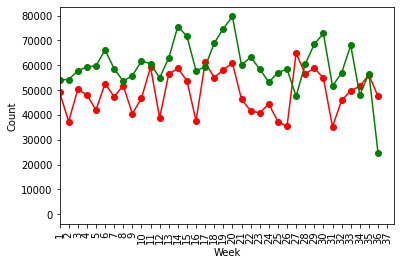

In [60]:
#started 2022/10/09 finished 2022/10/25 by Sheng and thanks for exploration from Audrey and Tiannan
#drop weekend and droped monday tuesday weekly steps
plt.plot(f3.index, f3['Steps1'], color="red",marker="o") 
plt.xlabel('Week')
plt.ylabel('Count')
plt.plot(f3.index, f3['Steps2'], color="green",marker="o") 
plt.xticks(rotation=90)

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1)  # Set the x range matching the dataframe above

That we can see that dropping this individual walk significantly less on weekend than weekdays as shown in the weekly step comaprison.

(1.0, 37.8)

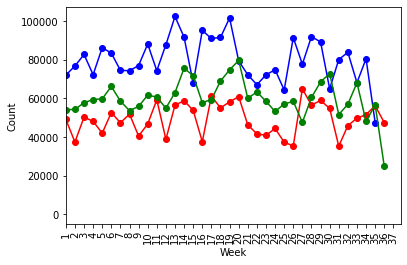

In [63]:
#total weekly steps to droped weekend and dropped monday tuesday weekly steps
plt.plot(f.index, f['Steps'], color="blue",marker="o") 
plt.plot(f3.index, f3['Steps1'], color="red",marker="o") 
plt.plot(f3.index, f3['Steps2'], color="green",marker="o") 
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=90)

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1)  # Set the x range matching the dataframe above


Then we looked at the comparison with total step counts to identify the dropped weekly steps relative to total weekly steps.

In [47]:

#started 2022/10/18 finished 2022/10/18 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n1['Start']), "Steps":n1['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling

d1 = d[pd.to_datetime(d.Date).dt.weekday < 5]
#d1['Date'] = pd.to_datetime(d1['Date'])
#e1 = d1.resample('W', on="Date").sum()#resample to combine days into weeks
#f5 = e1.reset_index(drop=False)#give index again


#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
day_exclusion = [0,1]
d2 = d[~(pd.to_datetime(d['Date']).dt.weekday.isin(day_exclusion))]
#d2['Date'] = pd.to_datetime(d2['Date'])
#e2 = d2.resample('W', on="Date").sum()#resample to combine days into weeks
#f6 = e2.reset_index(drop=False)#give index again

h = pd.DataFrame({"Date": pd.to_datetime(d['Date']), "Steps1":d1['Steps'],'Steps2':d2['Steps']})
e1 = h.resample('W', on="Date").sum()#resample to combine days into weeks
f4 = e1.reset_index(drop=False)#give index again
f4

,Date,Steps1,Steps2
0,2022-01-02,0.000000,14793.000000
1,2022-01-09,35371.000000,34812.000000
2,2022-01-16,35954.000000,34928.000000
3,2022-01-23,55362.000000,45273.000000
4,2022-01-30,38897.000000,33628.000000
5,2022-02-06,41232.000000,36054.000000
6,2022-02-13,39971.000000,41740.000000
7,2022-02-20,49292.000000,44865.000000
8,2022-02-27,37688.000000,32210.000000
9,2022-03-06,34585.000000,37528.000000


(1.0, 38.85)

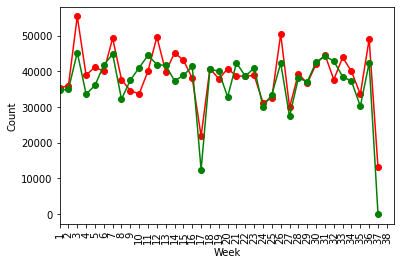

In [64]:
#started 2022/10/18 finished 2022/10/18 by Sheng and thanks for exploration from Audrey and Tiannan
plt.plot(f4.index, f4['Steps1'], color="red",marker="o") 

plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.plot(f4.index, f4['Steps2'], color="green",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1)  # Set the x range matching the dataframe above

That we can see that dropping this individual has relative similar setps on weekend than weekdays as shown in the weekly step comaprison.

(1.0, 38.85)

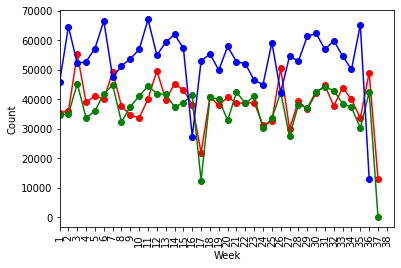

In [54]:
plt.plot(f4.index, f4['Steps1'], color="red",marker="o") 
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.plot(f4.index, f4['Steps2'], color="green",marker="o") 


plt.plot(f1.index, f1['Steps'], color="blue",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1)  # Set the x range matching the dataframe above



Then we looked at the comparison with total step counts to identify the dropped weekly steps relative to total weekly steps.

In [55]:

#started 2022/10/18 finished 2022/10/18 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n2['Start']), "Steps":n2['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling

d1 = d[pd.to_datetime(d.Date).dt.weekday < 5]
#d1['Date'] = pd.to_datetime(d1['Date'])
#e1 = d1.resample('W', on="Date").sum()#resample to combine days into weeks
#f7 = e1.reset_index(drop=False)#give index again

#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
day_exclusion = [0,1]
d2 = d[~(pd.to_datetime(d['Date']).dt.weekday.isin(day_exclusion))]
#d2['Date'] = pd.to_datetime(d2['Date'])
#e2 = d2.resample('W', on="Date").sum()#resample to combine days into weeks
#f8 = e2.reset_index(drop=False)#give index again


h = pd.DataFrame({"Date": pd.to_datetime(d['Date']), "Steps1":d1['Steps'],'Steps2':d2['Steps']})
e1 = h.resample('W', on="Date").sum()#resample to combine days into weeks
f5 = e1.reset_index(drop=False)#give index again
f5

,Date,Steps1,Steps2
0,2022-01-02,0.0,14973.0
1,2022-01-09,35714.0,39204.0
2,2022-01-16,37922.0,28466.0
3,2022-01-23,27398.0,34444.0
4,2022-01-30,41439.0,38296.0
5,2022-02-06,33371.0,44101.0
6,2022-02-13,54659.0,49792.0
7,2022-02-20,35724.0,38833.0
8,2022-02-27,44493.0,46195.0
9,2022-03-06,17890.0,15866.0


(1.0, 38.85)

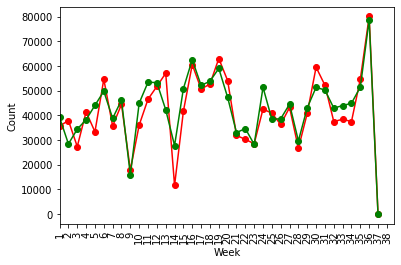

In [56]:
#started 2022/10/18 finished 2022/10/18 by Sheng and thanks for exploration from Audrey and Tiannan
plt.plot(f5.index, f5['Steps1'], color="red",marker="o") 
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.plot(f5.index, f5['Steps2'], color="green",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1)  # Set the x range matching the dataframe above

That we can see that dropping this individual has relative similar setps on weekend than weekdays as shown in the weekly step comaprison.

(1.0, 38.85)

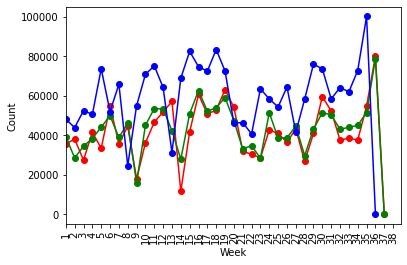

In [57]:
plt.plot(f5.index, f5['Steps1'], color="red",marker="o") 
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.plot(f5.index, f5['Steps2'], color="green",marker="o") 


plt.plot(f2.index, f2['Steps'], color="blue",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1)  # Set the x range matching the dataframe above


Then we looked at the comparison with total step counts to identify the dropped weekly steps relative to total weekly steps.

### Paired t-test of between dropped weekly steps

In [35]:
#perform paired t-test to test the difference in weekday and weekend differences. Participant 4
stats.ttest_rel(f3['Steps1'],f3['Steps2'])

Ttest_relResult(statistic=-6.460271242732253, pvalue=1.6935105685788618e-07)

Shows that Participant 4's weekly step count is not equal when dropped weekend or monday and tuesday.

In [58]:
stats.ttest_rel(f4['Steps1'],f4['Steps2'])

Ttest_relResult(statistic=1.8662465680954612, pvalue=0.06994853999463141)

Shows that Participant 7's weekly step count is not equal when when dropped weekend or monday and tuesday.

In [59]:
stats.ttest_rel(f5['Steps1'],f5['Steps2'])

Ttest_relResult(statistic=-1.7066193143295125, pvalue=0.09627393754131995)

Shows that Participant 8's weekly step count is not equal when dropped weekend or monday and tuesday.

## Conclusion

Thus, we found that there are no clear pattern between the participants' weekly steps. We did found that participant with both similar and very different weekly steps when comparing weekend against week days. So, it highlights how weekly step data relies on individual habits, and more data would require for further pursuit in the driving and sub question.